## Notebook to start making projections over the twenty first century


This notebook is used to make projections of the wind influence on sea level rise in the 21th century. 



From the regression between zos and vas/uas (cmip6 data) the regression coefficients are used to make predictions into the 21st century (files: nearby_wind_regression_cmip6, timmerman_regression_cmip6, dangendorf_regression_cmip6). Only models are used that perform well according to spectral analysis (file: comparison). 


Currently, the analysed scenarios are 2.6, 4.5 and 8.5

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Projections/code')

import import_data as imprt
import projections as proj
import figures as fig

sce_labels = ['ssp126', 'ssp245', 'ssp585']
sce_names = ['SSP1-2.6', 'SSP2-4.5', 'SSP5-8.5']
use_models = 'bestmodels'


#### Import zos data

In [2]:
# Open data file
zos_126 = imprt.import_cmip6_slh_data(data_type = 'ssp126', use_models = use_models)
zos_245 = imprt.import_cmip6_slh_data(data_type = 'ssp245', use_models = use_models)
zos_585 = imprt.import_cmip6_slh_data(data_type = 'ssp585', use_models = use_models)

#### Plot zos data

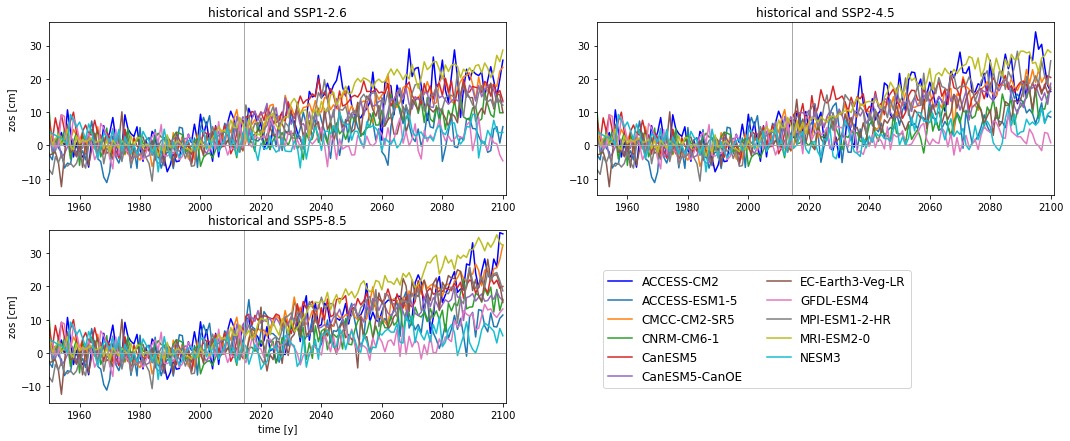

In [3]:
scenarios_zos = [zos_126, zos_245, zos_585]

fig.plot_zos_per_scenario(scenarios_zos, sce_labels, sce_names, hist_start = 1950)

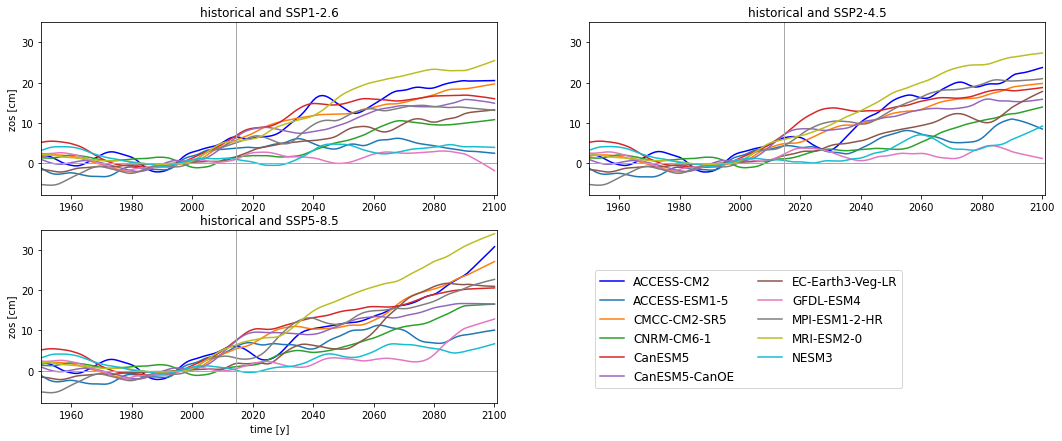

In [4]:
fig.plot_zos_per_scenario(scenarios_zos, sce_labels, sce_names, hist_start = 1950, smoothed = True)

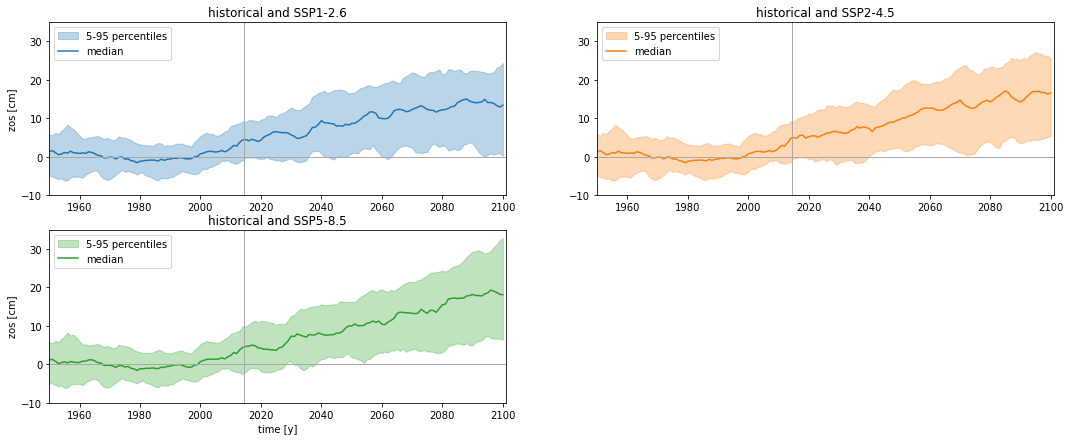

In [5]:
fig.plot_zos_med_percentiles_per_scenarios(scenarios_zos, sce_labels, sce_names, ra=5, hist_start = 1950)

## NearestPoint wind regression model

MSL = constant + coef_u2 x u2 + coef_v2 x v2


What do we need to obtain projections?
- cmip6 data for scenario
- regression results over historical period (from the regression of sea level averaged over all stations)
- whether these regression results are significant

In [6]:
model_np = 'NearestPoint'

#### Import wind data

In [7]:
# Open data file
wind_126_np = imprt.import_cmip6_wind_data(data_type = 'ssp126', use_models = use_models)
wind_245_np = imprt.import_cmip6_wind_data(data_type = 'ssp245', use_models = use_models)
wind_585_np = imprt.import_cmip6_wind_data(data_type = 'ssp585', use_models = use_models)

#### Plot wind data

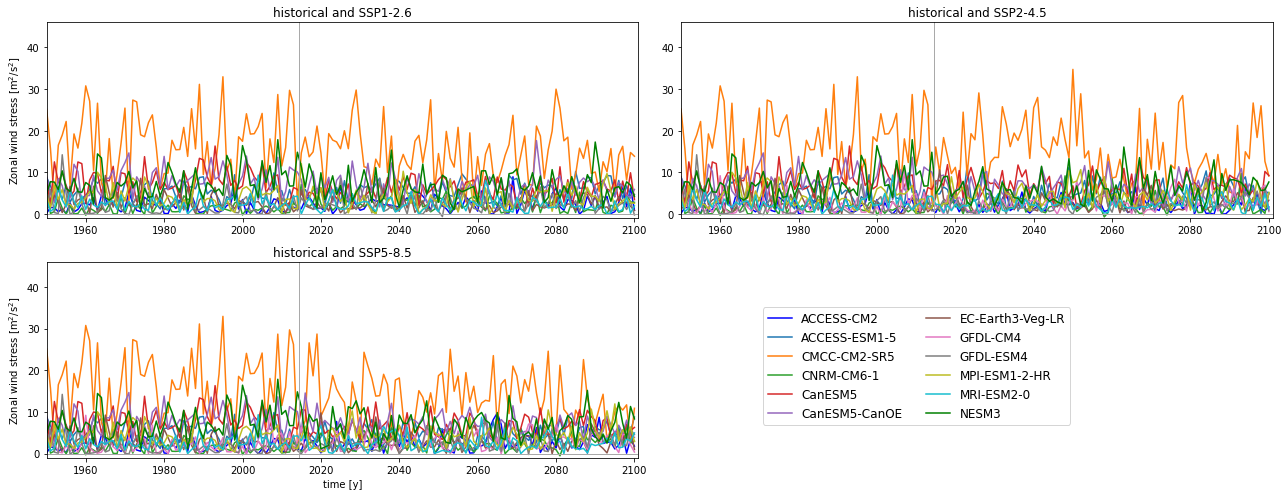

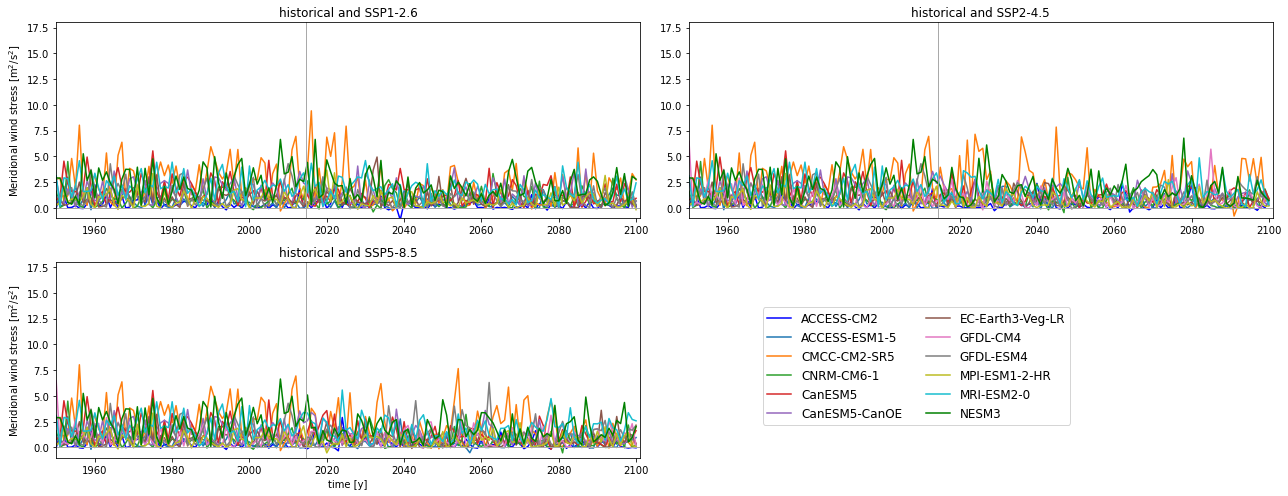

In [8]:
wind_scenarios_np = [wind_126_np, wind_245_np, wind_585_np]

fig.plot_wind_per_scenario(wind_scenarios_np, sce_labels, sce_names, hist_start = 1950)

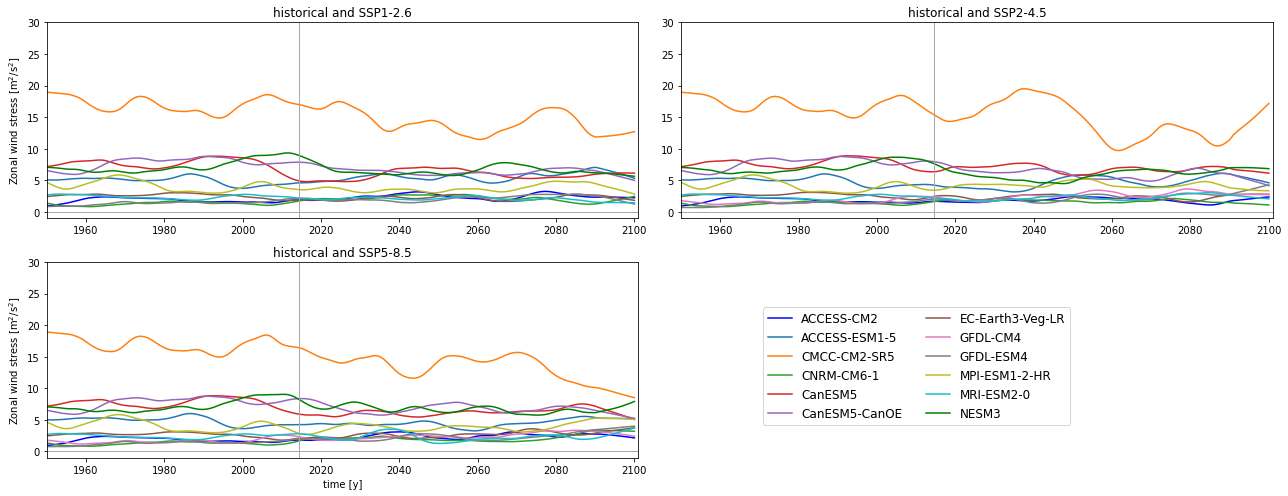

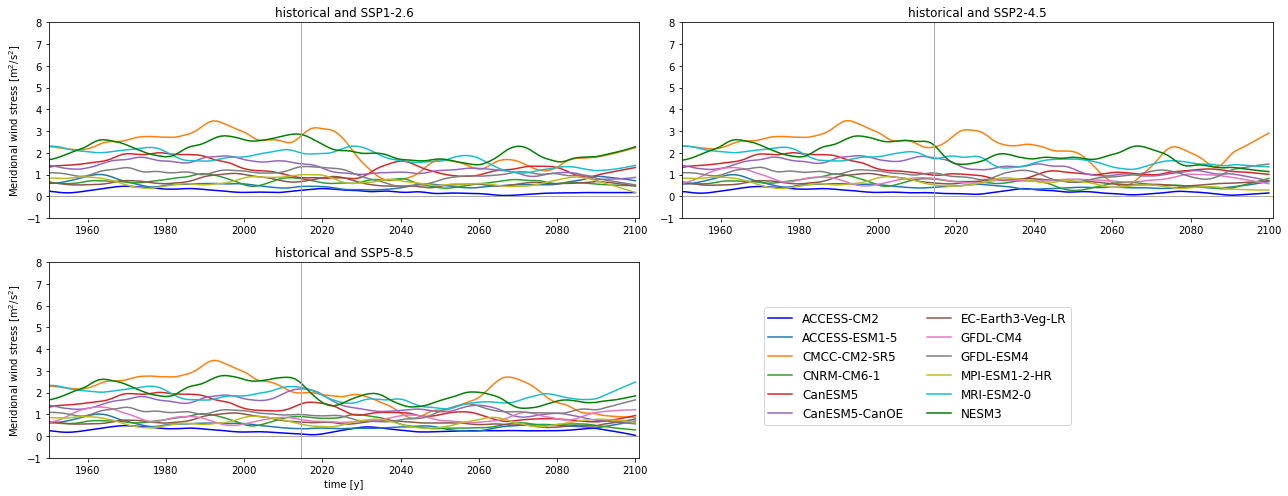

In [9]:
fig.plot_wind_per_scenario(wind_scenarios_np, sce_labels, sce_names, hist_start = 1950, smoothed = True)

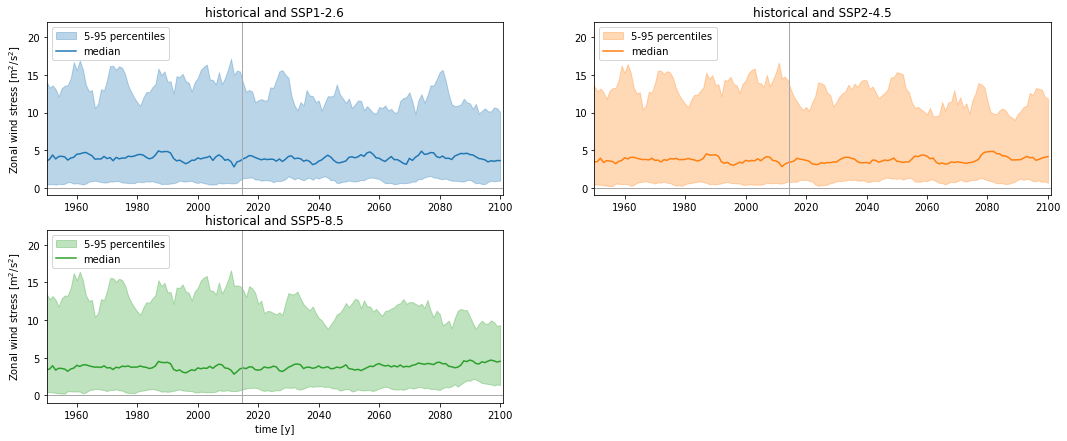

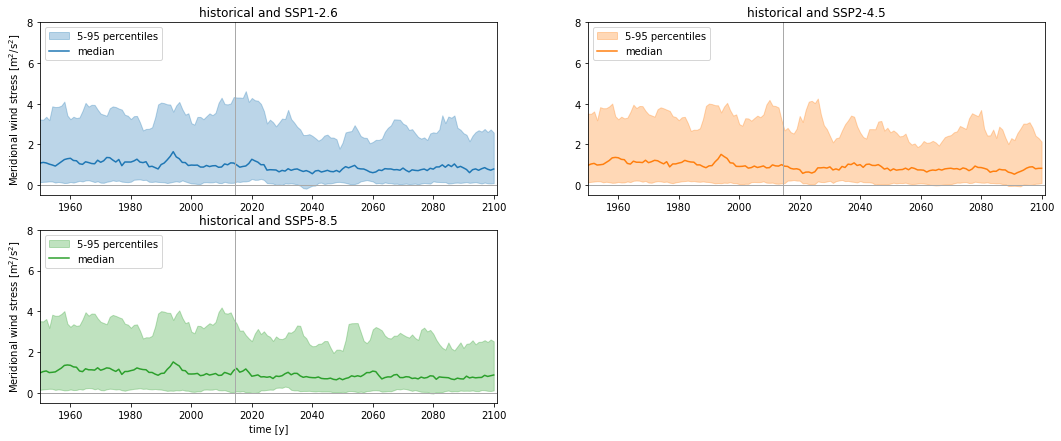

In [10]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

#### Obtain projections

In [11]:
proj_126_np, results_np = proj.wind_contr_proj(wind_126_np)
proj_245_np, results_np = proj.wind_contr_proj(wind_245_np)
proj_585_np, results_np = proj.wind_contr_proj(wind_585_np)

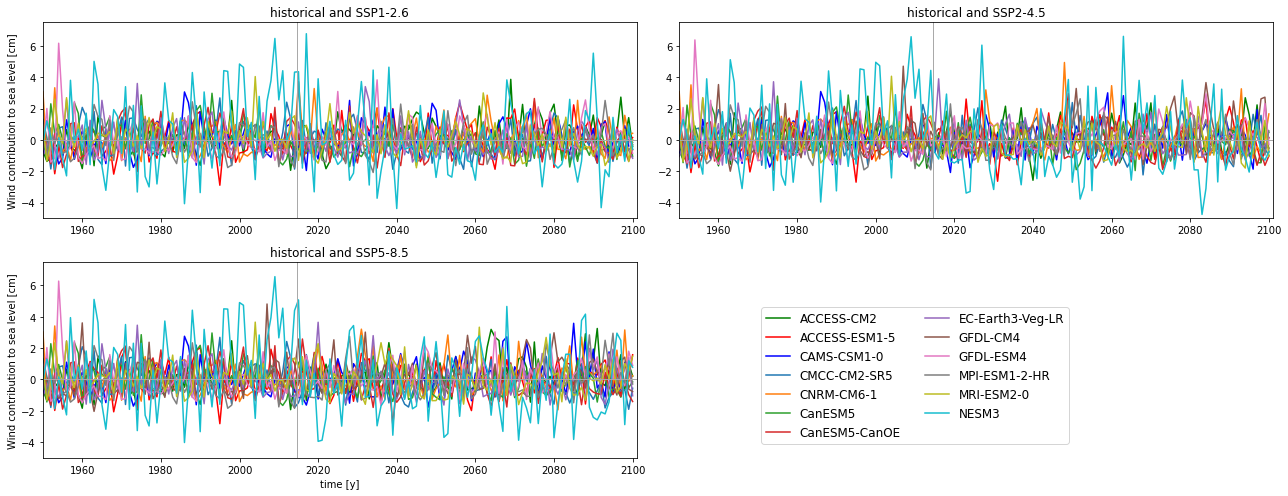

In [12]:
scenarios_np = [proj_126_np, proj_245_np, proj_585_np]

fig.plot_projections_per_scenario(scenarios_np, sce_labels, sce_names, hist_start = 1950)

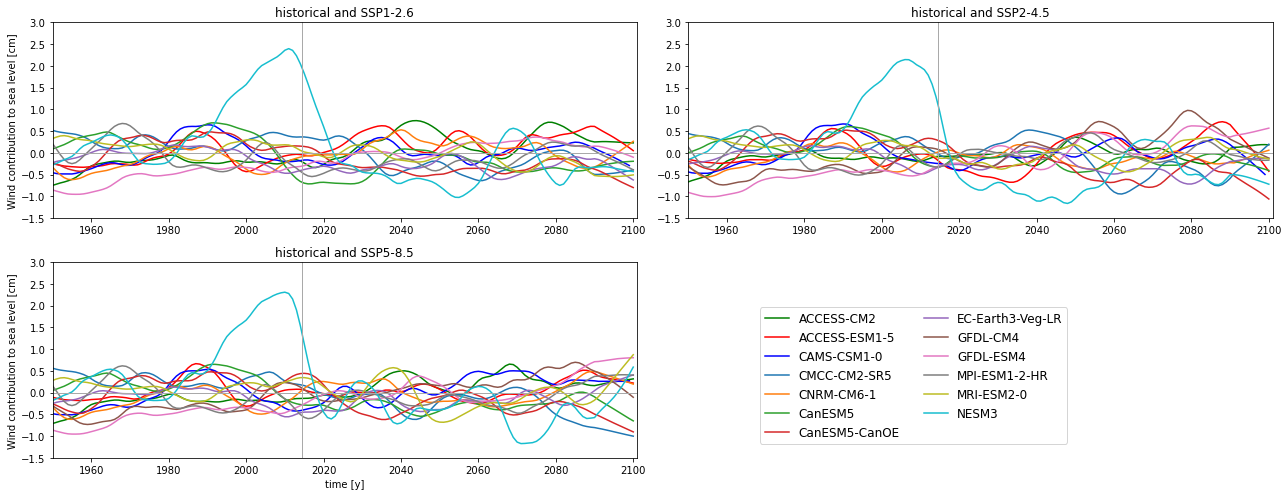

In [13]:
fig.plot_projections_per_scenario(scenarios_np, sce_labels, sce_names, hist_start = 1950, smoothed = True)

Not much difference between the scenarios.

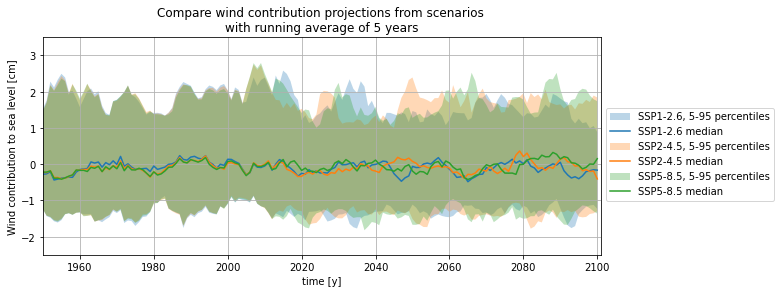

In [14]:
fig.plot_med_percentiles_scenarios(scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

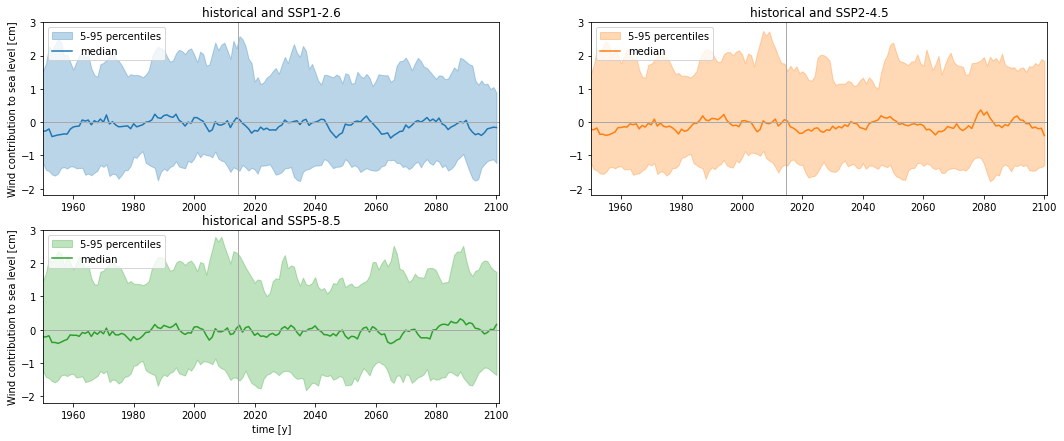

In [15]:
fig.plot_med_percentiles_per_scenarios(scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

## Timmerman wind regression model

MSL       =    

            constant

         + (coef_u2 x u2 + coef_v2 x v2)_channel + (coef_u2 x u2 + coef_v2 x v2)_south

         + (coef_u2 x u2 + coef_v2 x v2)_midwest + (coef_u2 x u2 + coef_v2 x v2)_mideast
         
         + (coef_u2 x u2 + coef_v2 x v2)_northwest + (coef_u2 x u2 + coef_v2 x v2)_northeast



In [16]:
model_tim = 'Timmerman'

#### Import wind data

In [17]:
# Open data file
wind_126_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp126')
wind_245_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp245')
wind_585_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp585')


#### Plot wind data

The wind is plotted per model as an average over the Timmerman regions

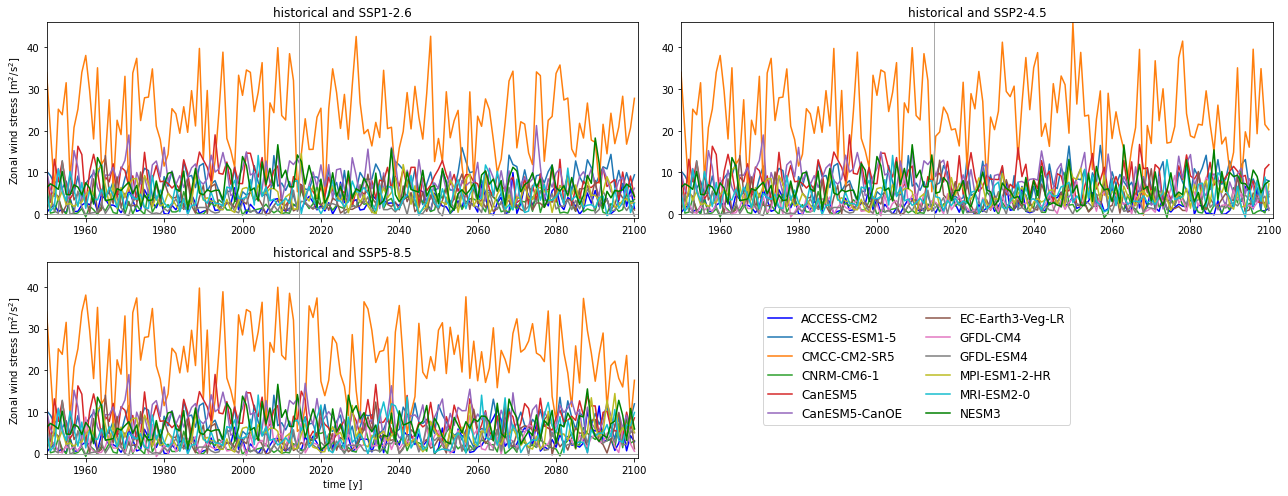

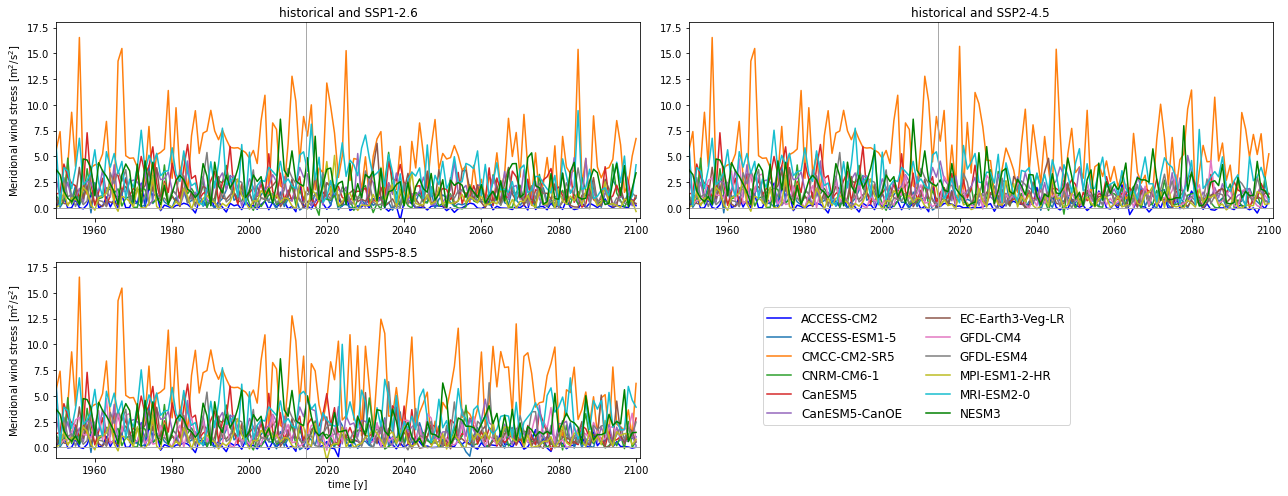

In [18]:
wind_scenarios_tim = [wind_126_tim, wind_245_tim, wind_585_tim]

fig.plot_wind_per_scenario(wind_scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

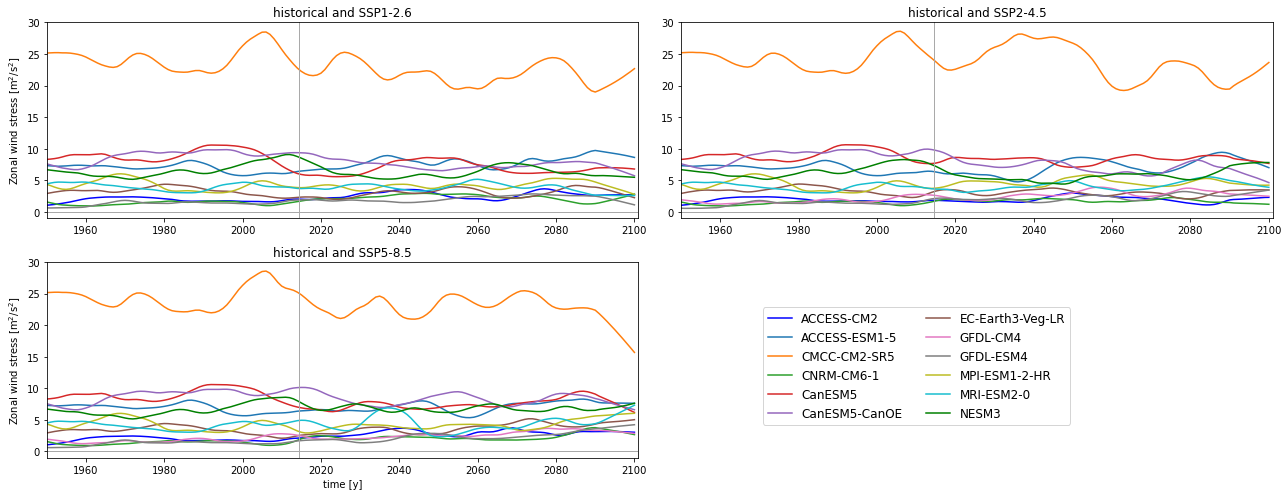

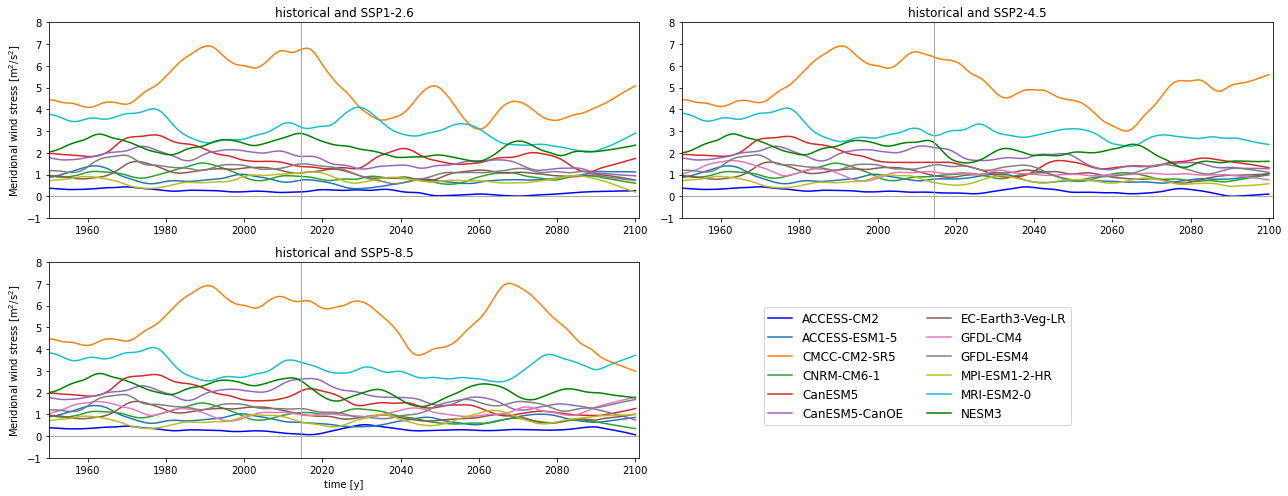

In [19]:
fig.plot_wind_per_scenario(wind_scenarios_tim, sce_labels, sce_names, hist_start = 1950, smoothed = True, wind_model = model_tim)

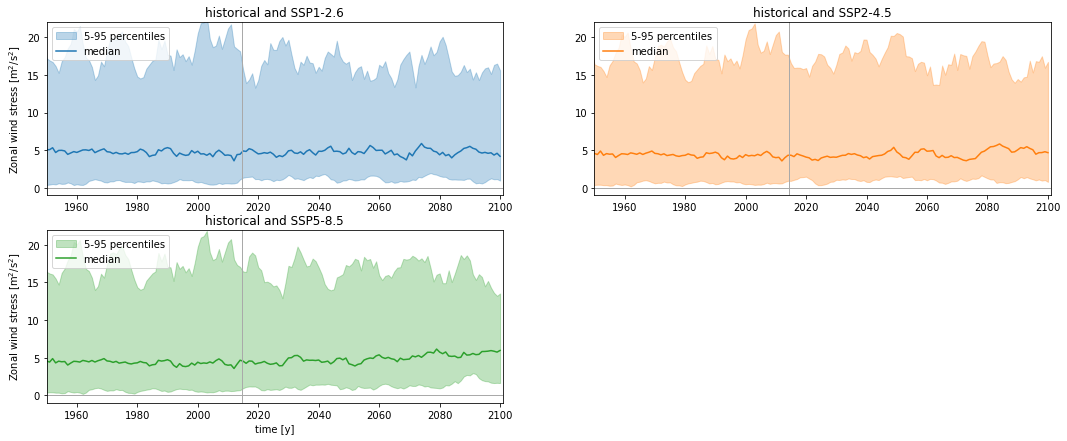

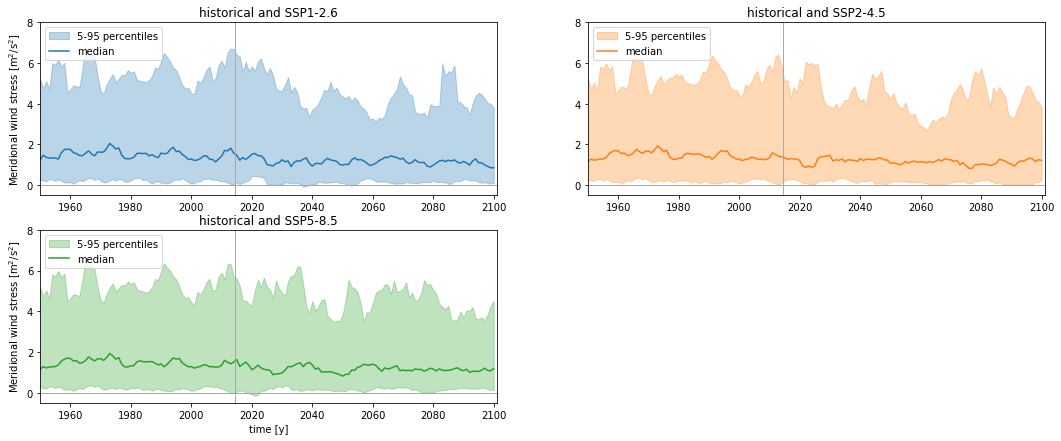

In [20]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_tim, sce_labels, sce_names, ra=5, hist_start = 1950, wind_model = model_tim)

In [21]:
proj_126_tim, results_tim = proj.wind_contr_proj(wind_126_tim, wind_model = model_tim)
proj_245_tim, results_tim = proj.wind_contr_proj(wind_245_tim, wind_model = model_tim)
proj_585_tim, results_tim = proj.wind_contr_proj(wind_585_tim, wind_model = model_tim)

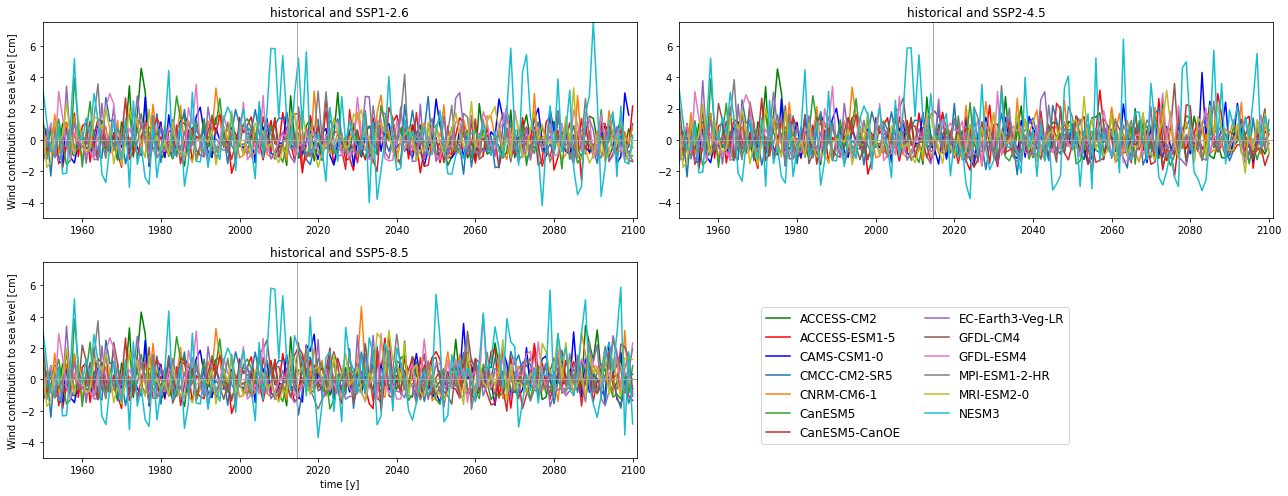

In [22]:
scenarios_tim = [proj_126_tim, proj_245_tim, proj_585_tim]

fig.plot_projections_per_scenario(scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

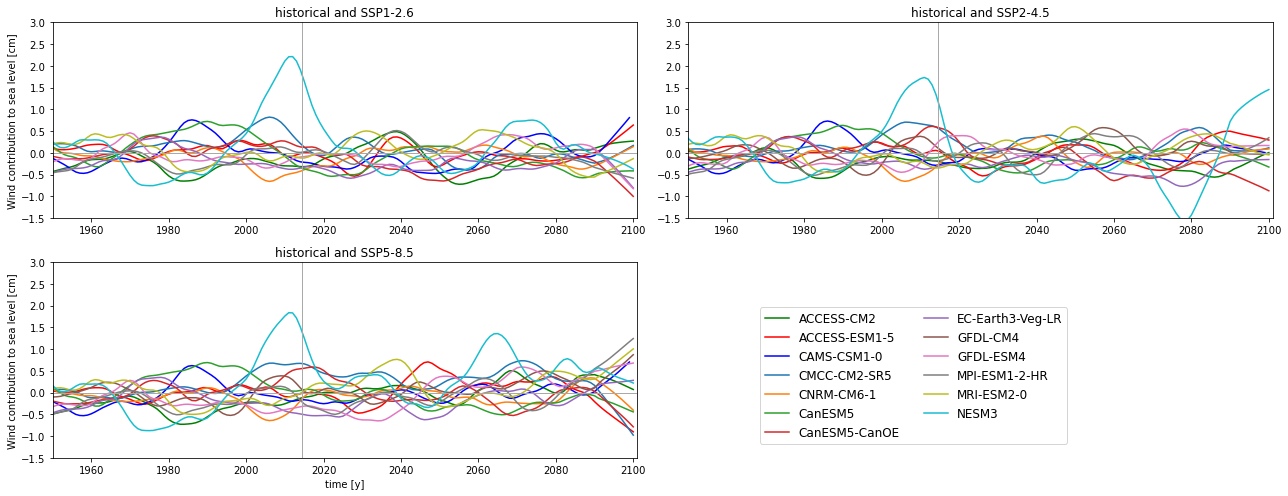

In [23]:
fig.plot_projections_per_scenario(scenarios_tim, sce_labels, sce_names, hist_start = 1950, smoothed = True, wind_model = model_tim)

Especially the non-smoothed projections are very different from the NearestPoint wind model

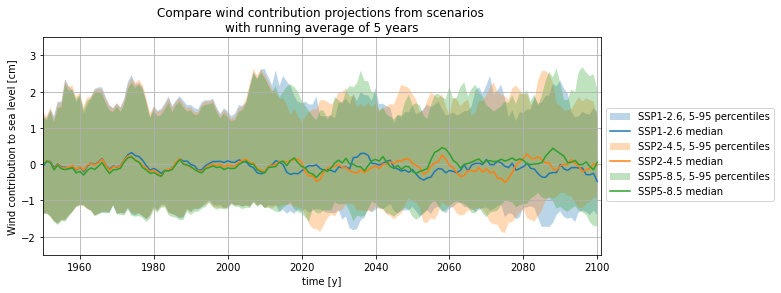

In [24]:
fig.plot_med_percentiles_scenarios(scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

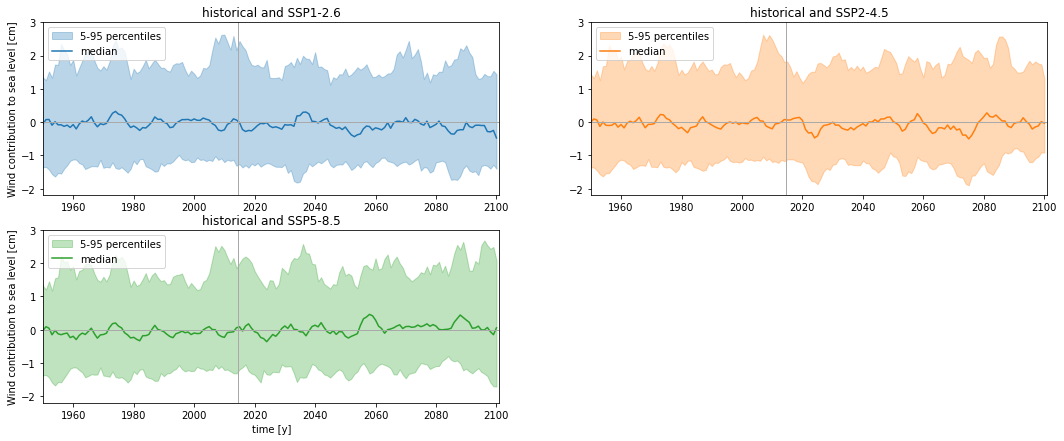

In [25]:
fig.plot_med_percentiles_per_scenarios(scenarios_tim, sce_labels, sce_names, hist_start = 1950, ra=5, wind_model = model_tim)

## Dangendorf wind regression model

MSL = constant + coef_neg x negative corr. region + coef_pos x positive corr. region



In [26]:
model_da = 'Dangendorf'

#### Import pressure data

In [27]:
# Open data file
wind_126_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp126')
wind_245_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp245')
wind_585_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp585')

#### Plot pressure data

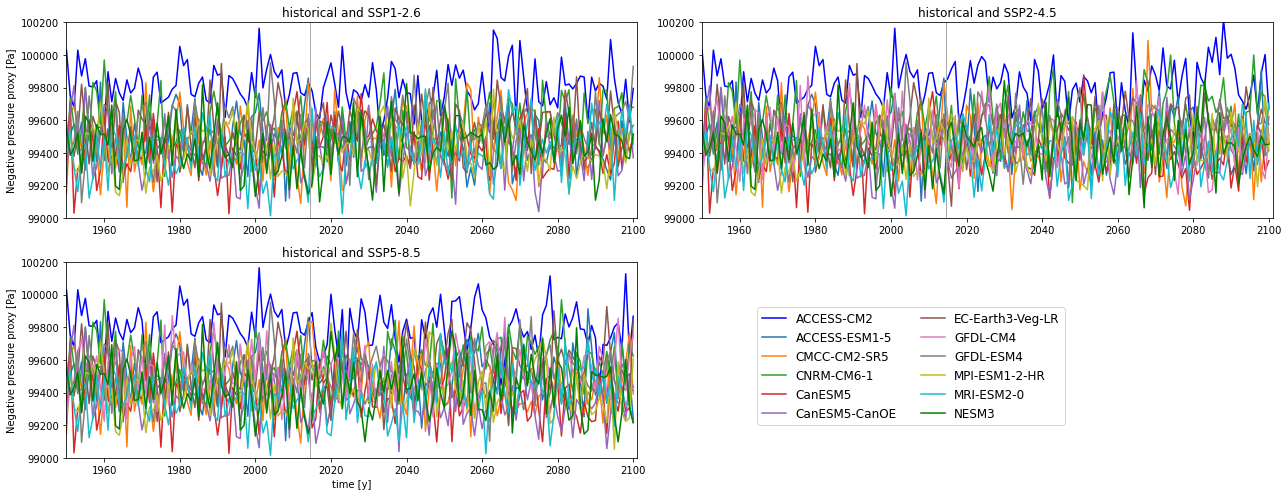

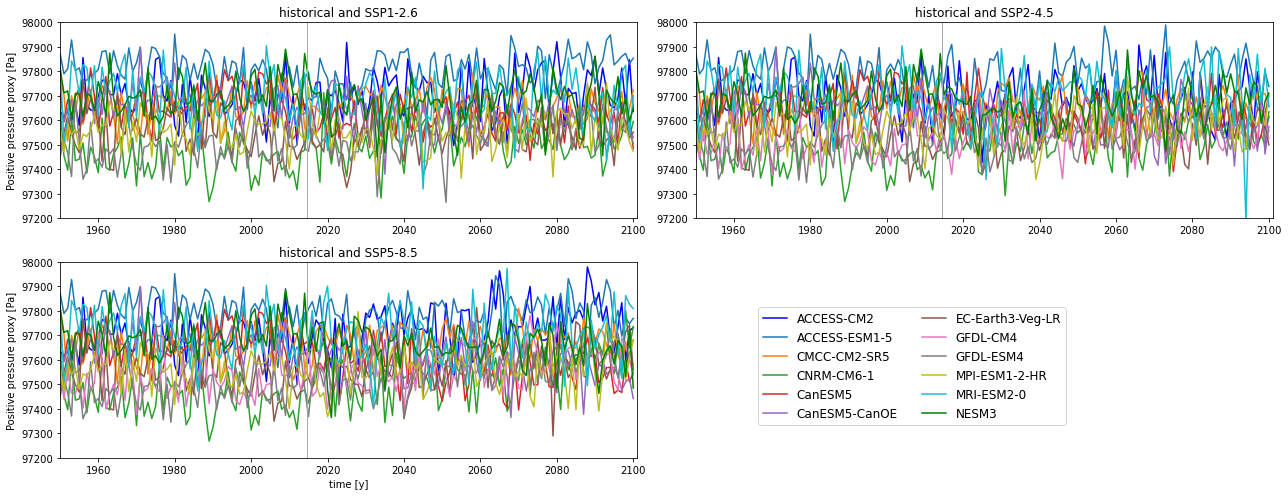

In [28]:
wind_scenarios_da = [wind_126_da, wind_245_da, wind_585_da]

fig.plot_wind_per_scenario(wind_scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

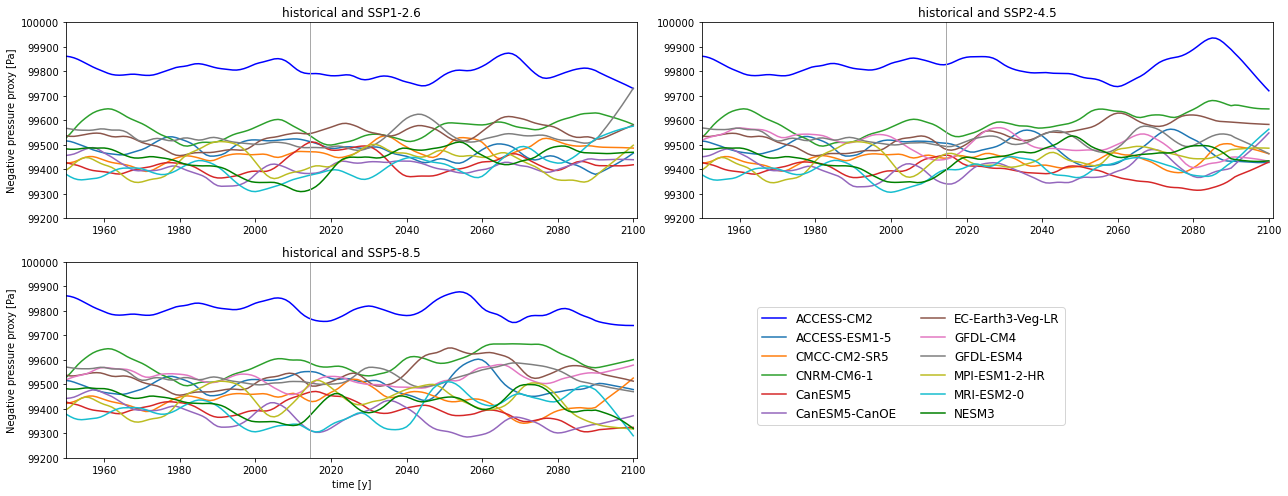

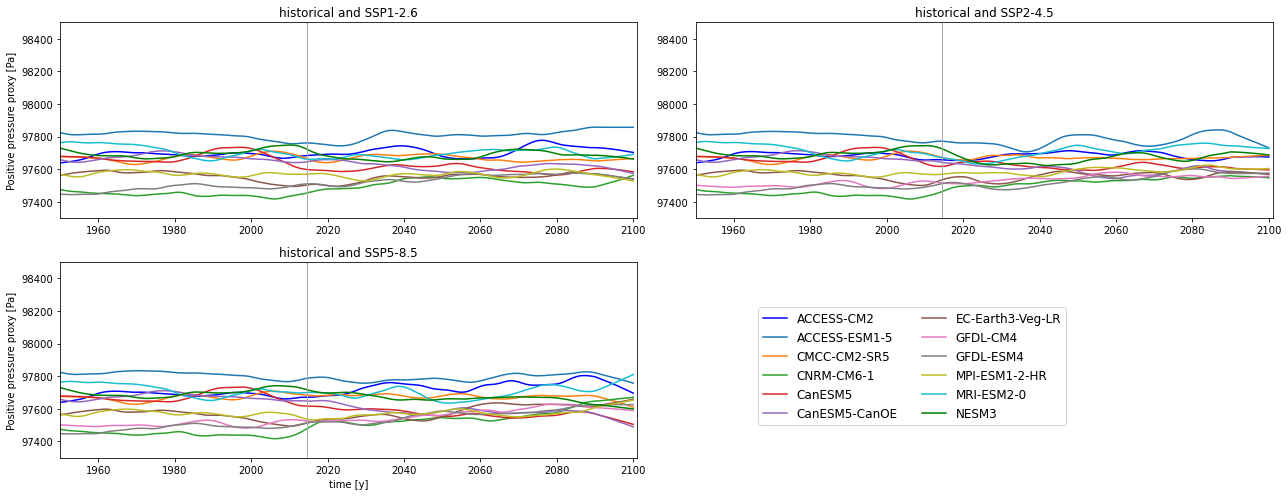

In [29]:
fig.plot_wind_per_scenario(wind_scenarios_da, sce_labels, sce_names, hist_start = 1950, smoothed = True, wind_model = model_da)

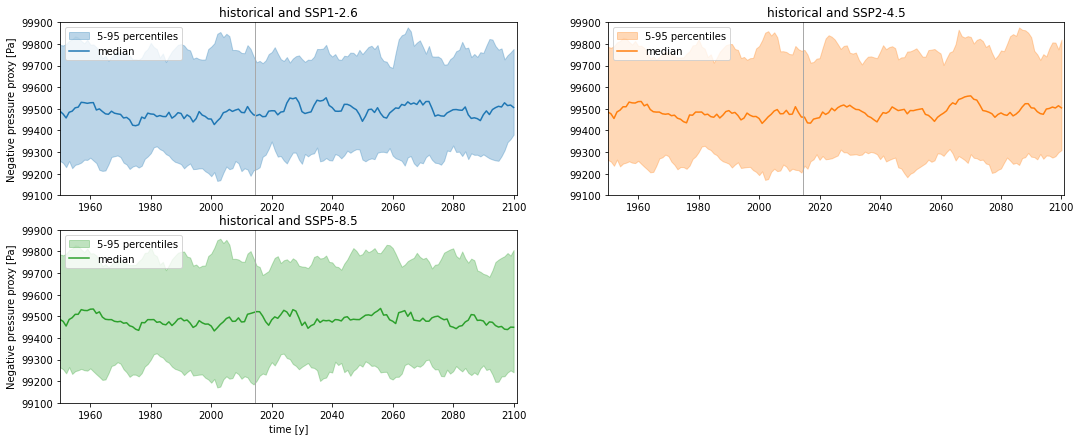

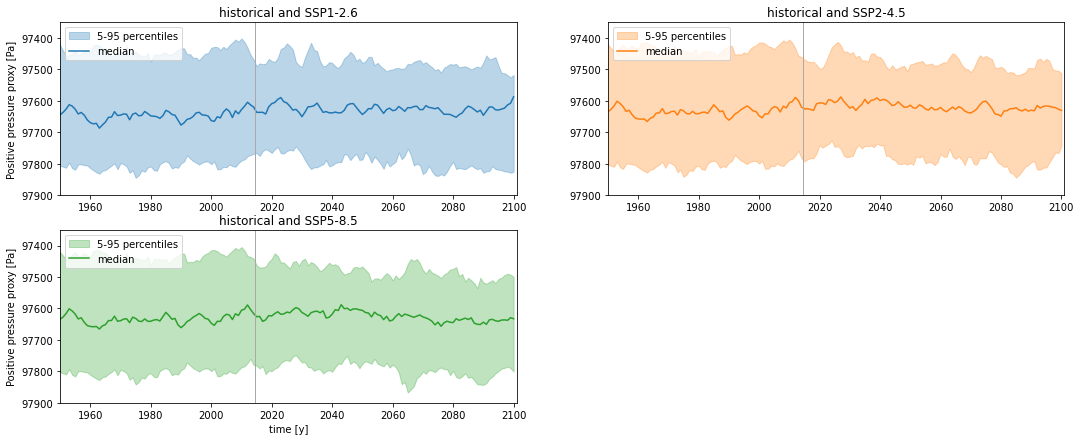

In [30]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_da, sce_labels, sce_names, ra=5, hist_start = 1950, wind_model = model_da)

In [31]:
proj_126_da, results_da = proj.wind_contr_proj(wind_126_da, wind_model = model_da)
proj_245_da, results_da = proj.wind_contr_proj(wind_245_da, wind_model = model_da)
proj_585_da, results_da = proj.wind_contr_proj(wind_585_da, wind_model = model_da)

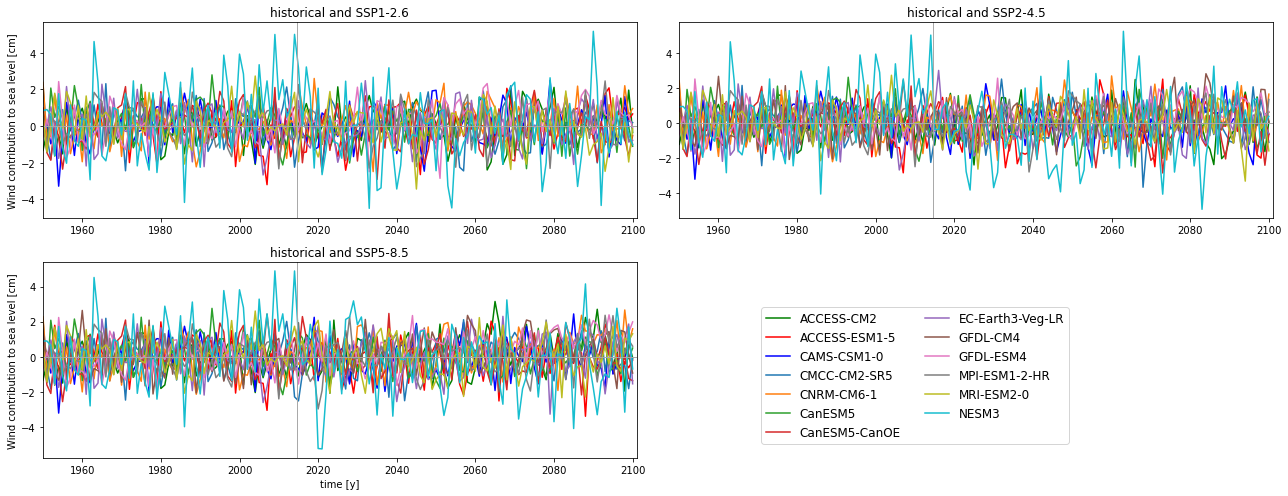

In [32]:
scenarios_da = [proj_126_da, proj_245_da, proj_585_da]

fig.plot_projections_per_scenario(scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

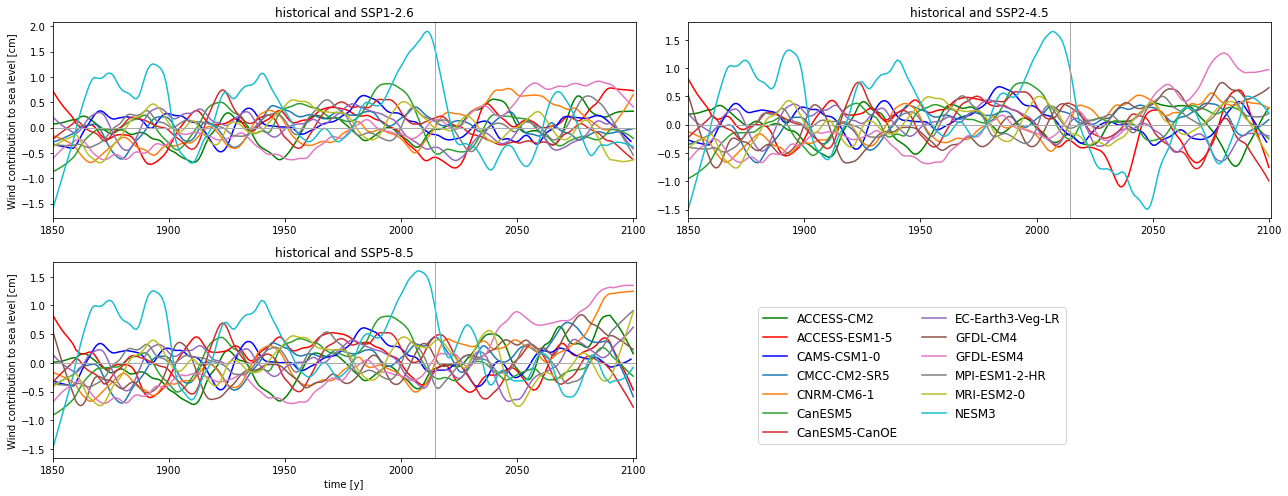

In [33]:
fig.plot_projections_per_scenario(scenarios_da, sce_labels, sce_names, hist_start = 1850, smoothed = True, wind_model = model_da)

Especially the non-smoothed projections are very different from the NearestPoint wind model

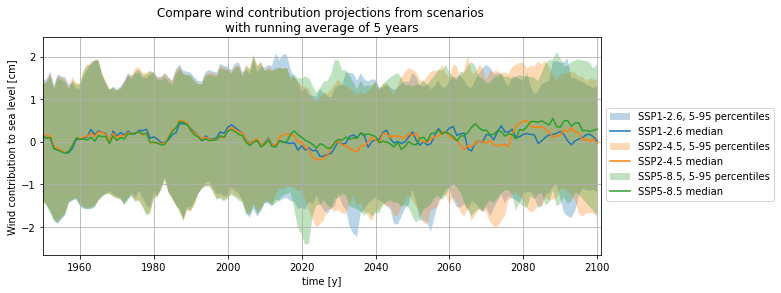

In [34]:
fig.plot_med_percentiles_scenarios(scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

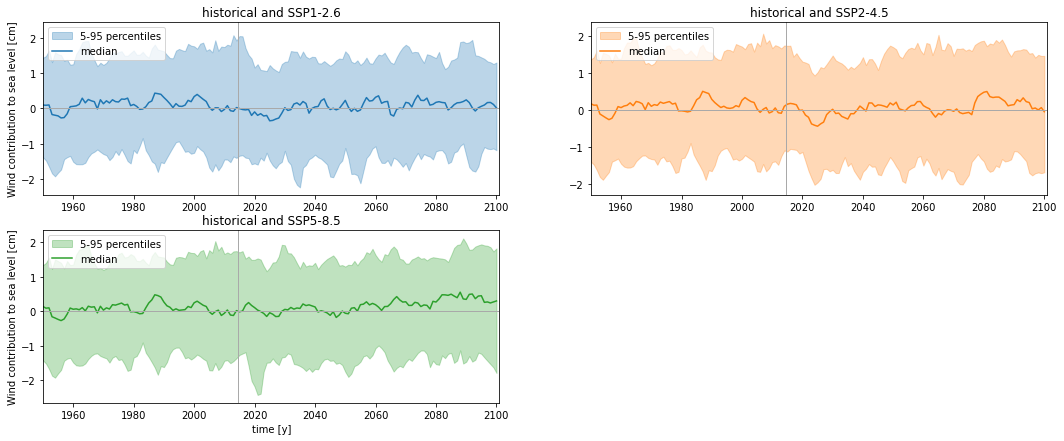

In [35]:
fig.plot_med_percentiles_per_scenarios(scenarios_da, sce_labels, sce_names, hist_start = 1950, ra=5, wind_model = model_da)

## Compare the different wind models

#### Historical and projected wind contribution to mean sea level

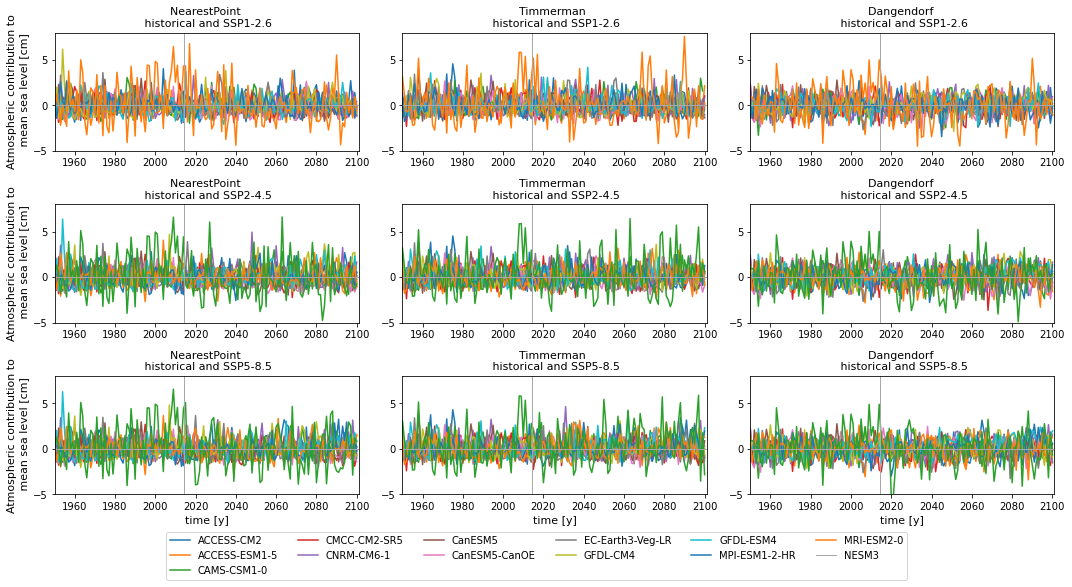

In [36]:
scenarios_comp = [scenarios_np, scenarios_tim, scenarios_da]

fig.plot_projections_per_scenario_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950)

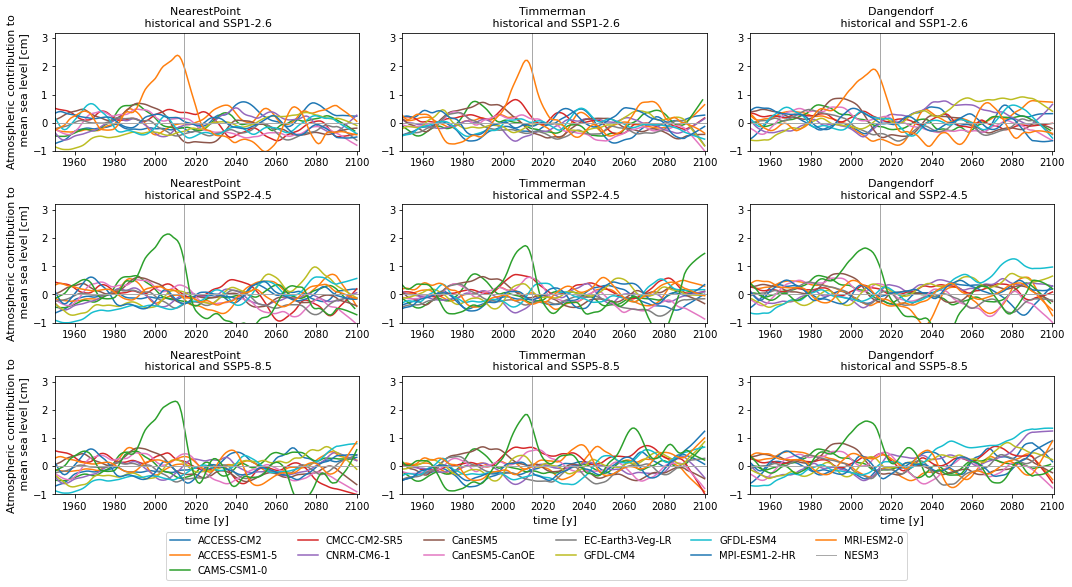

In [37]:
fig.plot_projections_per_scenario_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950, smoothed = True)

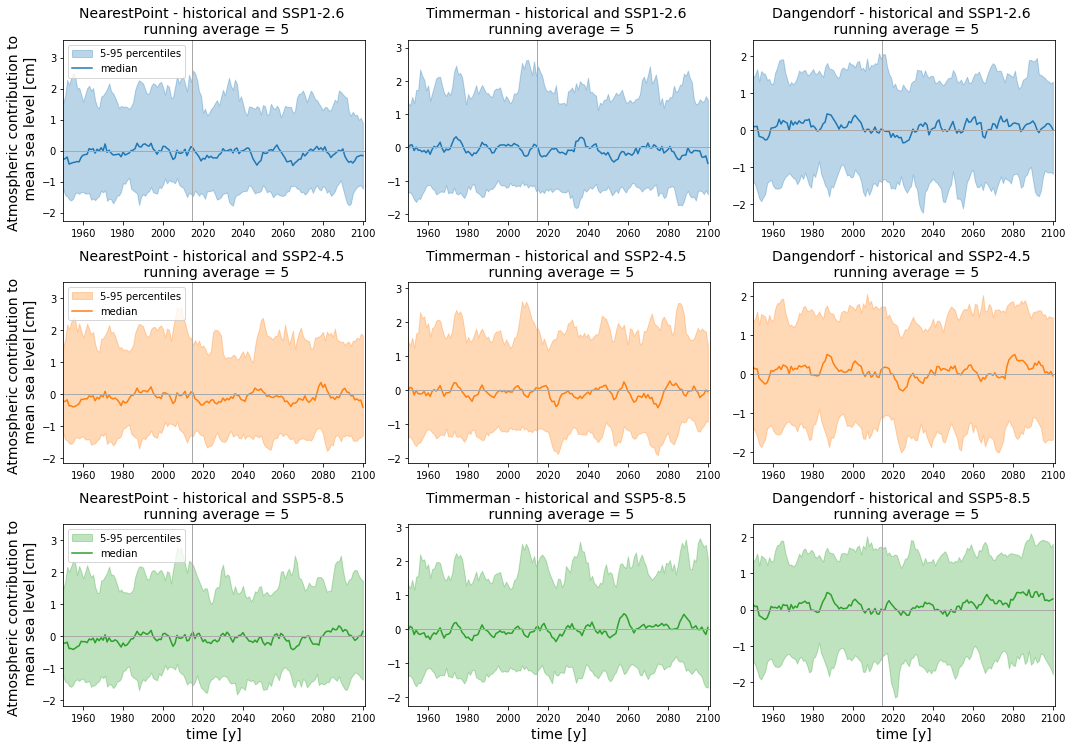

In [38]:
fig.plot_med_percentiles_per_scenarios_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950, ra=5)

### Annual trends over 2001 - 2100

Dangendorf found trends between -0.14 and 0.60 mm/y

Text(0, 0.5, 'Linear trend [mm/y]')

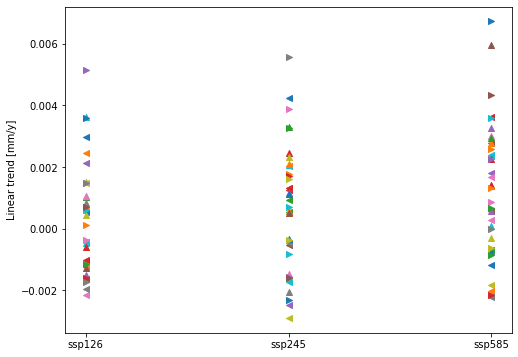

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

wind_labels = ['NearestPoint', 'Timmerman', 'Dangendorf']
markers = ['<', '^', '>']


plt.figure(figsize=(8,6))

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se']})
        df = df.set_index('variable')
        for k, model in enumerate(scenario.columns): # loop over the models
            trend = linregress(scenario.index.values, scenario[model].values).slope
            se = linregress(scenario.index.values, scenario[model].values).stderr
            df[model] = [trend, se]
            
            plt.scatter(sce_labels[j], trend, marker = markers[i])
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = sce_labels))
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)

plt.ylabel('Linear trend [mm/y]')



In [40]:
def significance_test(p, alpha):
    if p < alpha: return True
    else: return False

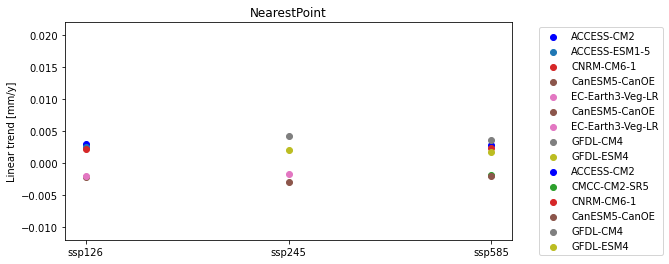

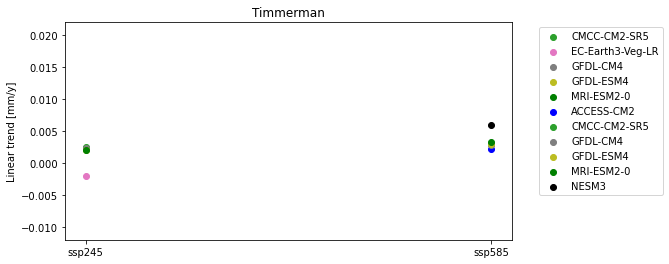

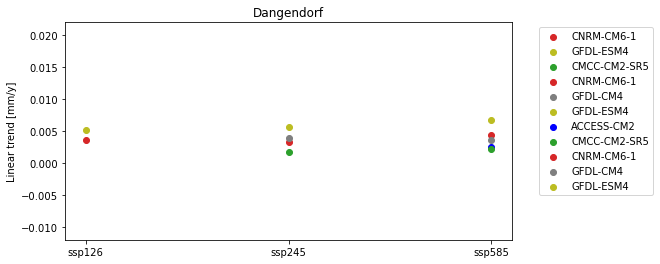

In [41]:
colors = ['b', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'g', 'k']
models = scenarios_comp[0][2].columns
significance_level = 95

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    
    plt.figure(figsize=(8,4))
    plt.title(wind_labels[i])
    plt.ylabel('Linear trend [mm/y]')
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se', 'sig']})
        df = df.set_index('variable')
        for k, model in enumerate(models): # loop over the models
            if model in scenario:
                trend = linregress(scenario.index.values, scenario[model].values).slope
                se = linregress(scenario.index.values, scenario[model].values).stderr
                p = linregress(scenario.index.values, scenario[model].values).pvalue
                sig = significance_test(p, 1-significance_level/100)
                df[model] = [trend, se, sig]
                #plt.errorbar(labels[j], trend, yerr=se, fmt="o", label = 'Tide gauge')
                if sig:
                    plt.scatter(sce_labels[j], trend, color = colors[k], label = model)
                
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = sce_labels))
    plt.ylim(-0.012, 0.022)
    plt.legend(bbox_to_anchor=(1.05, 1.0))
    
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)



Most annual trends are not significant on the 95% significance level and the significant ones are very very small.

### Plot percentile bars

Following: https://github.com/dlebars/CMIP_SeaLevel/blob/master/notebooks/plot_zostoga.ipynb

#### 2001 - 2021

In [42]:
percentiles, median = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names)

In [43]:
percentiles

NearestPoint                                                     \
          Percentile: 5   Percentile: 17   Percentile: 50   Percentile: 83    
scenario                                                                      
SSP1-2.6           -0.01            -0.01             -0.0              0.0   
SSP2-4.5           -0.01            -0.01             -0.0             0.01   
SSP5-8.5           -0.01            -0.01              0.0             0.01   

                                Timmerman                                    \
          Percentile: 95   Percentile: 5   Percentile: 17   Percentile: 50    
scenario                                                                      
SSP1-2.6             0.01           -0.01            -0.01             -0.0   
SSP2-4.5             0.01           -0.01             -0.0             -0.0   
SSP5-8.5             0.01           -0.01             -0.0              0.0   

                                                Dangendorf                   \
          Percentile: 83   Percentile: 95   Percentile: 5   Percentile: 17    
scenario                                                                      
SSP1-2.6              0.0              0.0           -0.01             -0.0   
SSP2-4.5              0.0              0.0           -0.01             -0.0   
SSP5-8.5             0.01             0.01           -0.01             -0.0   

                                                             
          Percentile: 50   Percentile: 83   Percentile: 95   
scenario                                                     
SSP1-2.6              0.0             0.01             0.01  
SSP2-4.5              0.0             0.01             0.01  
SSP5-8.5              0.0             0.01             0.01

In [44]:
median

NearestPoint Timmerman Dangendorf
scenario                                  
SSP1-2.6         -0.0      -0.0        0.0
SSP2-4.5         -0.0      -0.0        0.0
SSP5-8.5          0.0       0.0        0.0

In [45]:
scenario = scenarios_comp[0][0]
year_s = 1850
year_e = 1900

df_trend = pd.DataFrame({'variable':['trend']})
df_trend = df_trend.set_index('variable')
for model in scenario:
    df_trend[model] = linregress(scenario[model].loc[year_s:year_e].index,
                                                scenario[model].loc[year_s:year_e].values).slope
                
df_trend.quantile(p/100, axis=1).values[0]

-0.029395151197675922

In [46]:
df_trend

ACCESS-CM2  ACCESS-ESM1-5  CAMS-CSM1-0  CMCC-CM2-SR5  CNRM-CM6-1  \
variable                                                                     
trend      -0.014467       -0.02976     0.010281      0.019828    0.001572   

           CanESM5  CanESM5-CanOE  EC-Earth3-Veg-LR  GFDL-ESM4  MPI-ESM1-2-HR  \
variable                                                                        
trend     0.017968       0.002594          -0.00006    0.00346       0.020044   

          MRI-ESM2-0    NESM3  
variable                       
trend       0.019475  0.03939

In [47]:
year_s = 2000
year_e = 2100

linregress(scenario[model].loc[year_s:year_e].index,
                                                scenario[model].loc[year_s:year_e].values).slope

-0.022475202683932147

In [48]:
median['NearestPoint'].index

Index(['SSP1-2.6', 'SSP2-4.5', 'SSP5-8.5'], dtype='object', name='scenario')

In [49]:
median['NearestPoint'].values

array([-0.0, -0.0, 0.0], dtype=object)

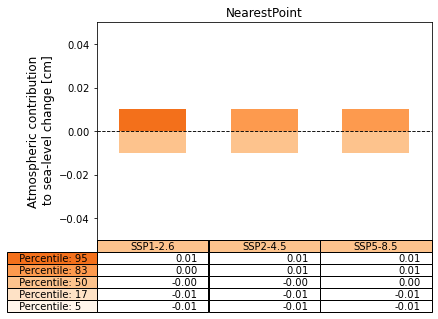

In [50]:
fig.summary_fig_and_table(percentiles['NearestPoint'].T, wind_model = 'NearestPoint')

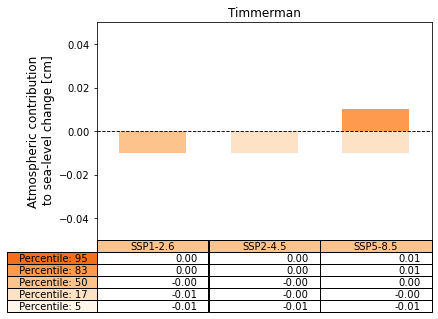

In [51]:
fig.summary_fig_and_table(percentiles['Timmerman'].T, wind_model = 'Timmerman')

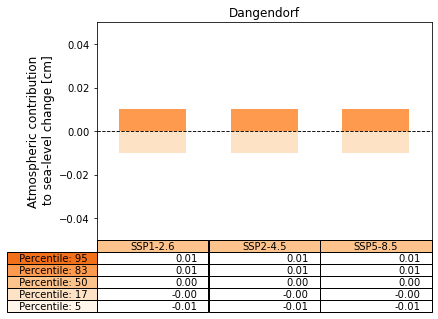

In [52]:
fig.summary_fig_and_table(percentiles['Dangendorf'].T, wind_model = 'Dangendorf')

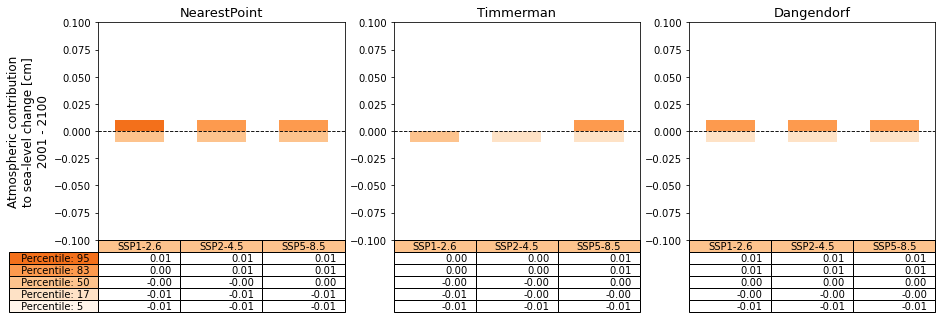

In [53]:
fig.summary_fig_and_table_all_wind_models(percentiles)

There is no significant long term change of atmospheric contribution to sea level over the 21st century. The observed wind influence is probably a natural variability

#### 1901 - 2000

In [54]:
percentiles_19 = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = 1900.5, year_e = 2000.5)

In [55]:
fig.summary_fig_and_table_all_wind_models(percentiles_19, period = '1901 - 2000', name = '1901_2000', ymin=-0.1, ymax=0.1)

TypeError: tuple indices must be integers or slices, not str

#### Different periods (50 years)

In [ ]:
years = [1900.5, 1950.5, 2000.5, 2050.5]
period = 50

for year in years:
    percentiles = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = year, year_e = year+period)
    year = round(year)
    fig.summary_fig_and_table_all_wind_models(percentiles, period = f'{year} - {year+period}', name = f'{year}_{year+period}', 
                                              ymin = -0.1, ymax=0.1)


#### Different periods (25 years)

In [ ]:
years = [1900.5, 1925.5, 1950.5, 1975.5, 2000.5, 2025.5, 2050.5, 2075.5]
period = 25

for year in years:
    percentiles = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = year, year_e = year+period)
    year = round(year)
    fig.summary_fig_and_table_all_wind_models(percentiles, period = f'{year} - {year+period}', name = f'{year}_{year+period}', 
                                              ymin = -0.1, ymax=0.1)
